In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Levanto el archivo
eventos = pd.read_csv('data/events.csv', low_memory=False)

In [3]:
eventos['model'].value_counts().head(10)

iPhone 6                  50916
iPhone 5s                 44878
iPhone 6S                 39296
iPhone 7                  27556
Samsung Galaxy S7 Edge    23926
Samsung Galaxy S7         19337
iPhone 7 Plus             18792
Samsung Galaxy S8         16959
iPhone SE                 16531
Samsung Galaxy J5         13044
Name: model, dtype: int64

In [4]:
telefonosComprados = eventos.loc[(eventos['event'] == 'conversion'),:]
telefonosComprados = telefonosComprados.loc[:,['person','model','condition','storage','color']]
telefonosComprados.head(5)

,person,model,condition,storage,color
220,00204059,Motorola Moto X2,Muito Bom,32GB,Couro Vintage
2282,00c13dee,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco
2547,00fdbb4b,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco
4245,0146a9df,iPhone 5s,Bom,32GB,Cinza espacial
6985,01db2fe6,Samsung Galaxy J5,Bom,16GB,Preto


In [5]:
telefonosComprados['marca'] = telefonosComprados.apply( lambda x: str(x['model']).split()[0], axis = 1)

In [6]:
telefonosComprados['marca'].value_counts()

Samsung     641
iPhone      323
Motorola    149
Sony         23
LG           20
Lenovo       14
Asus          2
Name: marca, dtype: int64

In [7]:
telefonosComprados[telefonosComprados['marca']=='Samsung']['model'].value_counts().head()

Samsung Galaxy J5                    88
Samsung Galaxy S6 Flat               39
Samsung Galaxy J7                    28
Samsung Galaxy A5                    27
Samsung Galaxy Gran Prime Duos TV    24
Name: model, dtype: int64

In [8]:
telefonosComprados[telefonosComprados['marca']=='iPhone']['model'].value_counts().head()

iPhone 5s    84
iPhone 6     71
iPhone 6S    37
iPhone 5c    33
iPhone SE    17
Name: model, dtype: int64

In [9]:
telefonosComprados[telefonosComprados['marca']=='Motorola']['model'].value_counts().head()

Motorola Moto G4 Plus           30
Motorola Moto G3 4G             30
Motorola Moto G2 3G Dual        17
Motorola Moto X Play 4G Dual    12
Motorola Moto G5                 7
Name: model, dtype: int64

In [10]:
eventos['marca'] = eventos.apply( lambda x: str(x['model']).split()[0], axis = 1)

In [11]:
eventos['marca'].value_counts()

nan           447004
iPhone        256585
Samsung       218127
Motorola       63518
LG              9724
Sony            7025
Lenovo          4779
Asus            2091
iPad            1914
Quantum          520
Blackberry         1
Name: marca, dtype: int64

In [12]:
#id mas solicitados
eventos['sku'].value_counts().head(10)

2830.0     4282
2831.0     3770
2829.0     3709
8443.0     3506
12758.0    2939
2833.0     2908
6371.0     2628
5907.0     2602
3371.0     2574
9930.0     2540
Name: sku, dtype: int64

In [13]:
idProductosMasSolicitados = eventos['sku'].value_counts().head(10).reset_index()
listaidsMasSolicitados = idProductosMasSolicitados['index'].tolist()

In [14]:
productosMasSolicitados = eventos.loc[eventos['sku'].isin(listaidsMasSolicitados)]
productosMasSolicitados.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca
104,2018-06-06 18:40:51,viewed product,001bb7eb,NaN,9930.0,iPhone 7,Bom,32GB,Preto Matte,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
179,2018-02-14 20:37:41,viewed product,00204059,NaN,2833.0,iPhone 6,Bom,64GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
180,2018-02-14 20:38:01,viewed product,00204059,NaN,2830.0,iPhone 6,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
185,2018-02-14 20:42:31,viewed product,00204059,NaN,2831.0,iPhone 6,Bom,16GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
358,2018-05-30 18:34:14,viewed product,002932b1,NaN,2833.0,iPhone 6,Bom,64GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone


In [15]:
productosMasSolicitados.groupby(['sku','model','color','event']).agg(np.size)['person'].unstack(3).sort_values('viewed product',ascending=False)

,,event,checkout,conversion,viewed product
sku,model,color,,,
2830.0,iPhone 6,Cinza espacial,272.0,3.0,4007.0
2829.0,iPhone 6,Prateado,239.0,4.0,3466.0
2831.0,iPhone 6,Dourado,343.0,4.0,3423.0
8443.0,Samsung Galaxy S7,Preto,237.0,4.0,3265.0
12758.0,Samsung Galaxy S8,Preto,218.0,7.0,2714.0
2833.0,iPhone 6,Cinza espacial,219.0,4.0,2685.0
9930.0,iPhone 7,Preto Matte,125.0,NaN,2415.0
5907.0,iPhone 5s,Cinza espacial,198.0,NaN,2404.0
3371.0,Samsung Galaxy S6 Flat,Dourado,217.0,14.0,2343.0


In [17]:
#id mas vistos
eventos['sku'].value_counts().head(10)
eventos[eventos['sku']== '2830.0']['event'].value_counts()


#sku   nombre del producto, visitas, checkouts, conversion
#2830  iphone 6             4007         272      3
#      iphone 5s             

viewed product    4007
checkout           272
conversion           3
Name: event, dtype: int64

In [22]:
productosConMayorVistaCompraCheckout.columns = ['id','Cantidad de Compra/Checkout/Visita','modelo','color']
tabla = productosConMayorVistaCompraCheckout.groupby(['id','modelo','color']).agg(np.size)
tabla

,,,Cantidad de Compra/Checkout/Visita
id,modelo,color,
12758.0,Samsung Galaxy S8,Preto,2939
2829.0,iPhone 6,Prateado,3709
2830.0,iPhone 6,Cinza espacial,4282
2831.0,iPhone 6,Dourado,3770
2833.0,iPhone 6,Cinza espacial,2908
3371.0,Samsung Galaxy S6 Flat,Dourado,2574
5907.0,iPhone 5s,Cinza espacial,2602
6371.0,Samsung Galaxy J5,Dourado,2628
8443.0,Samsung Galaxy S7,Preto,3506


Text(0.5,1,'Producto mas concurrentes en la pagina de Trocafone')

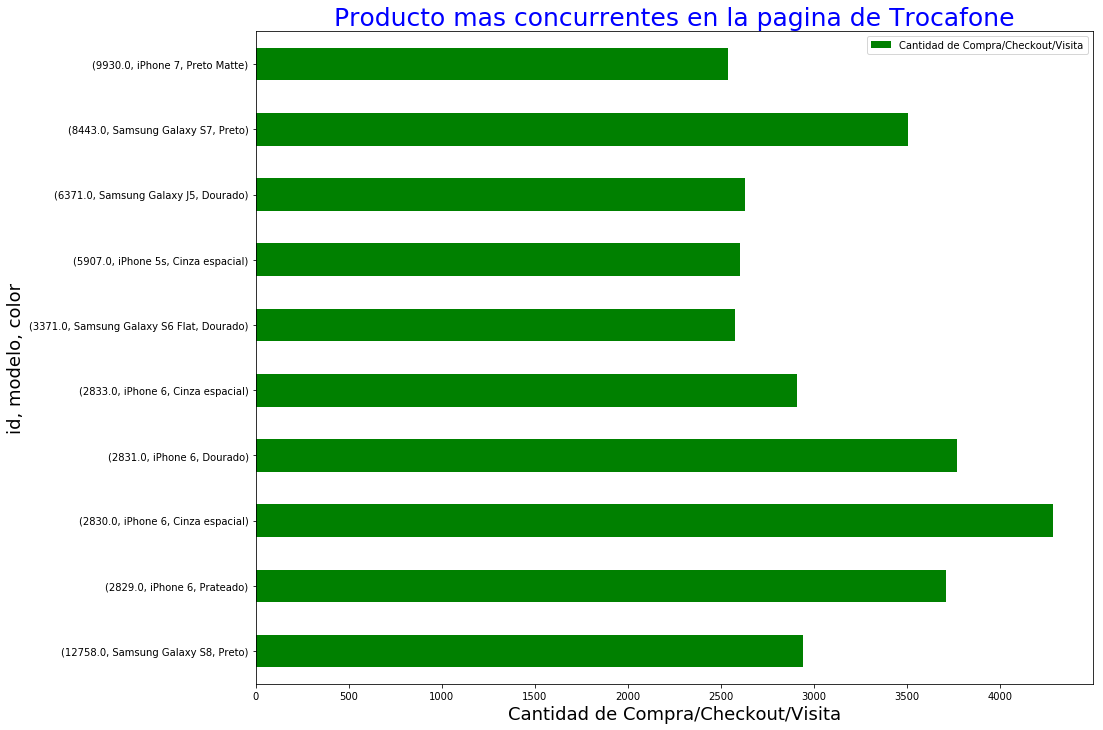

In [23]:
grafico = tabla.plot(kind='barh',figsize = (15,12), color = 'green')
grafico.set_ylabel('id, modelo, color',fontsize=18)
grafico.set_xlabel('Cantidad de Compra/Checkout/Visita',fontsize=18)
grafico.set_title('Producto mas concurrentes en la pagina de Trocafone', fontsize=25,color = 'blue')

In [24]:
eventos['sku'].value_counts().head(10)

2830.0     4282
2831.0     3770
2829.0     3709
8443.0     3506
12758.0    2939
2833.0     2908
6371.0     2628
5907.0     2602
3371.0     2574
9930.0     2540
Name: sku, dtype: int64

In [28]:
eventos['search_term'].value_counts()

Iphone                          1207
Iphone 6                        1057
iPhone 6                        1005
iphone 6                         932
iphone                           882
iphone 6s                        784
Iphone 6s                        736
iPhone 6s                        716
Motorola                         679
iPhone                           638
J7                               580
J5                               540
Samsung                          513
S7                               474
iphone 7                         428
Iphone 7                         412
iPhone 7                         371
j7                               370
s8                               354
S8                               346
Iphone 5s                        343
iPhone 5s                        339
iphone 5s                        315
IPhone 6                         315
j5                               310
S6                               302
s7                               289
6

In [29]:
#### de los que tienen 'lead'(suscripcion a producto sin stock para que avise cuando hay) ver si compraron o no esa persona


In [54]:
eventos[eventos['event']=='lead']['person'].value_counts().head()

97e0bcf2    16
52a4edd3    11
58692743     8
8dd8c1b4     6
d5661793     5
Name: person, dtype: int64

In [33]:
persona= eventos[eventos['person']=='97e0bcf2']
personaConMasSuscripciones = persona[persona['event']=='lead']
personaConMasSuscripciones['model'].value_counts()


Samsung Galaxy J7 Prime    14
Samsung Galaxy J7 PRO       1
Motorola Moto G4 Plus       1
Name: model, dtype: int64

In [34]:
persona[persona['event']=='conversion']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca
593901,2018-03-10 02:48:14,conversion,97e0bcf2,NaN,9273.0,Samsung Galaxy J7 Prime,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung


In [35]:
persona= eventos[eventos['person']=='52a4edd3']
personaConMasSuscripciones = persona[persona['event']=='lead']
personaConMasSuscripciones['model'].value_counts()

iPhone 6 Plus                3
Motorola Moto G5 Plus        3
Motorola Moto G3 4G          3
Motorola Moto G4 Play DTV    2
Name: model, dtype: int64

In [36]:
persona[persona['event']=='conversion']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca
314871,2018-04-17 17:39:01,conversion,52a4edd3,NaN,7617.0,Motorola Moto G3 4G,Bom,16GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Motorola


In [50]:
persona= eventos[eventos['person']=='58692743']
personaConMasSuscripciones = persona[persona['event']=='lead']
personaConMasSuscripciones['model'].value_counts()


iPhone 6S Plus    6
iPhone 6 Plus     2
Name: model, dtype: int64

In [38]:
persona[persona['event']=='conversion']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca


In [48]:
persona= eventos[eventos['person']=='8dd8c1b4']
personaConMasSuscripciones = persona[persona['event']=='lead']
personaConMasSuscripciones['model'].value_counts()


Samsung Galaxy A9 Pro 2016    3
iPhone 6 Plus                 2
Samsung Galaxy Note 4         1
Name: model, dtype: int64

In [49]:
personasConMasSuscripciones = eventos[eventos['event']=='lead']['person'].value_counts().head(5).reset_index()
personasConMasSuscripciones.columns = ['persona','cantidad de suscripciones']
personasConMasSuscripciones

,persona,cantidad de suscripciones
0,97e0bcf2,16
1,52a4edd3,11
2,58692743,8
3,8dd8c1b4,6
4,d5661793,5


In [57]:
persona[persona['event']=='conversion']
personasConMasSuscripciones.columns

Index(['persona', 'cantidad de suscripciones'], dtype='object')

In [61]:
tabla = personasConMasSuscripciones.groupby(['persona','evento']).agg(np.size).plot(kind='bar')

KeyError: 'evento'

In [60]:
persona= eventos[eventos['person']=='d5661793']
personaConMasSuscripciones = persona[persona['event']=='lead']
personaConMasSuscripciones['model'].value_counts()


Lenovo Vibe A7010 Dual Chip    4
LG K10 Novo                    1
Name: model, dtype: int64

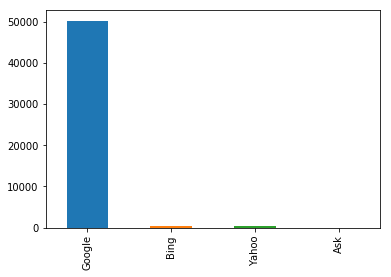

In [62]:
eventos.search_engine.value_counts().plot(kind='bar')

In [63]:
persona[persona['event']=='conversion']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca


In [64]:
tabla.columns

AttributeError: 'AxesSubplot' object has no attribute 'columns'

In [65]:
usuariosNuevosYYaRegistrados = eventos.loc[(eventos['new_vs_returning'] == 'New')
                                        |(eventos['new_vs_returning'] == 'Returning'),:]
usuariosNuevosYYaRegistrados['event'].value_counts()
#podemos ver q la clumna new_vs_returning solo se guarda para eventos del tipo visited site

visited site    87378
Name: event, dtype: int64

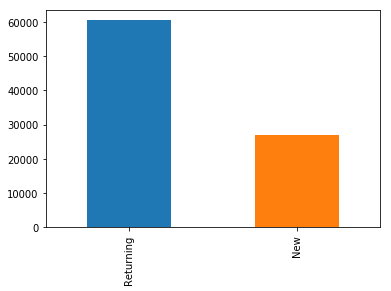

In [66]:
eventos['new_vs_returning'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(*args, **kw)>

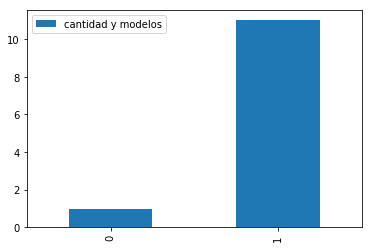

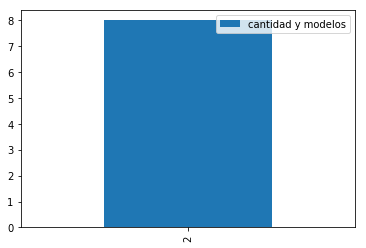

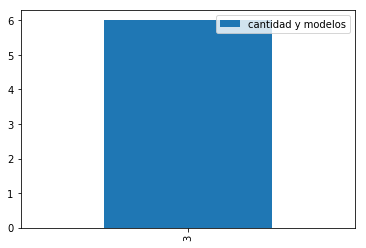

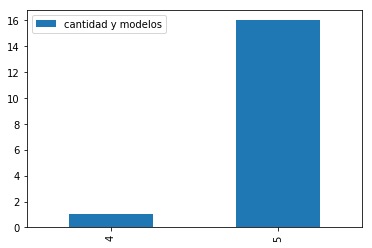

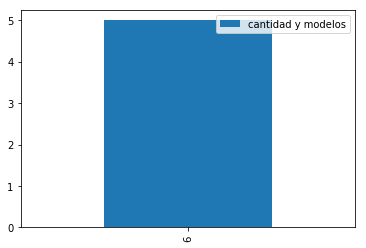

In [67]:
personasConMasSuscripciones = eventos[['event','person','model']]
personasConMasSuscripciones.columns = ['evento','persona','cantidad y modelos']
personasConMasSuscripciones = personasConMasSuscripciones[personasConMasSuscripciones['evento'].str.contains('lead|conversion')]
personasConMasSuscripciones = personasConMasSuscripciones.loc[(personasConMasSuscripciones['persona'] == '97e0bcf2')
                                        |(personasConMasSuscripciones['persona'] =='52a4edd3')
                                        |(personasConMasSuscripciones['persona'] =='58692743')
                                        |(personasConMasSuscripciones['persona'] =='8dd8c1b4')
                                        |(personasConMasSuscripciones['persona'] =='d5661793'),:]


#tabla = personasConMasSuscripciones.groupby(['persona','evento']).agg([np.size,np.array])
tabla = personasConMasSuscripciones.groupby(['persona','evento']).agg(np.size)
#tabla.columns = ['cantidad','modelos']
#tabla.plot(kind = 'bar')
#plt.show()
tabla.reset_index().groupby('persona').plot(kind='bar')
plt.show